### 参考：https://qiita.com/kzm4269/items/081ff2fdb8a6b0a6112f

# import 

In [1]:
RANDOM_STATE=0
import numpy as np
np.random.seed(seed=RANDOM_STATE)

from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# グラフ構築・可視化

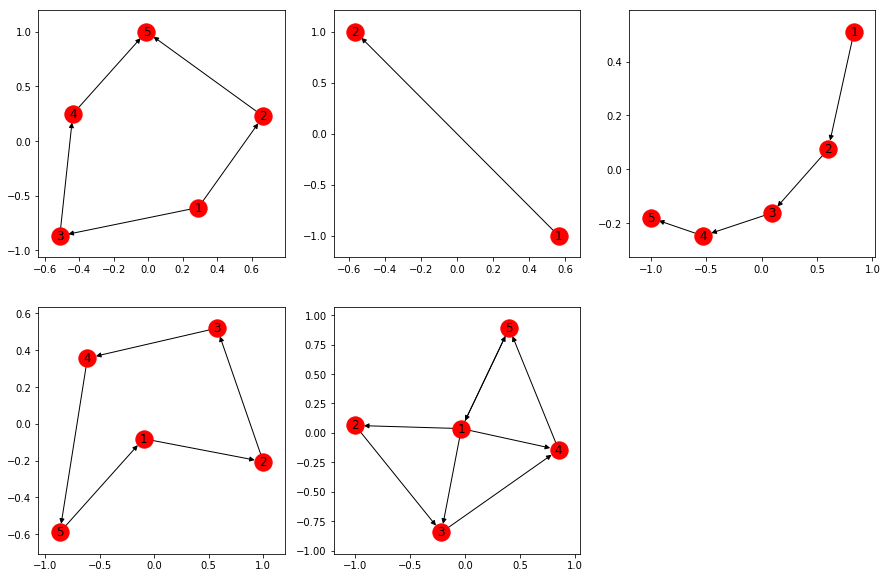

In [2]:
plt.figure(figsize=(15, 10))

G = nx.DiGraph()  # 有向グラフ (Directed Graph)

# node追加
G.add_node(1)
G.add_nodes_from([3, 4, 5])
# edge追加
G.add_edge(1, 2)  # nodeもよしなに追加される。追加順は保持される
G.add_edges_from([(1, 3), (2, 5), (3, 4), (4, 5)]) # edgeの追加順は保持されないっぽい？
plt.subplot(2, 3, 1)
nx.draw_networkx(G)

# edge削除
G.remove_edge(3, 4)                    
G.remove_edges_from([(1, 3), (2, 5)])
# node削除
G.remove_node(5)
G.remove_nodes_from([3, 4])
plt.subplot(2, 3, 2)
nx.draw_networkx(G)

# 指定したパス上の頂点と辺を追加
G.add_path([1, 2, 3, 4, 5])  # 1 → 2 → 3 → 4 → 5
plt.subplot(2, 3, 3)
nx.draw_networkx(G)

# 指定した閉路上の頂点と辺を追加
G.add_cycle([1, 2, 3, 4, 5])  # 1 → 2 → 3 → 4 → 5 → 1
plt.subplot(2, 3, 4)
nx.draw_networkx(G)

# 放射状に頂点と辺を追加
G.add_star([1, 2, 3, 4, 5])  # 1 → 2, 1 → 3, 1 → 4, 1 → 5
plt.subplot(2, 3, 5)
nx.draw_networkx(G)

# 基本的な情報の取得

G.nodes= [1, 2, 3, 4, 5]
G,edges= [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (3, 4), (4, 5), (5, 1)]
G.succ[1]= [2, 3, 4, 5]
G.out_edges(1)= [(1, 2), (1, 3), (1, 4), (1, 5)]
G.pred[5]= [4, 1]
G.in_edges(5)= [(4, 5), (1, 5)]
[4, 1] [(4, 5), (1, 5)]
G.degree(4)= 3
nx.all_neighbors(G, 4)= [3, 1, 5]


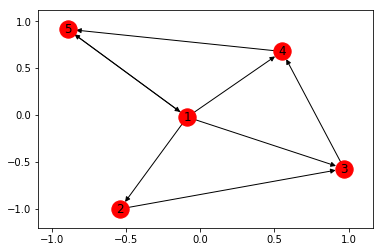

In [3]:
G = nx.DiGraph()
G.add_cycle([1, 2, 3, 4, 5])
G.add_star([1, 2, 3, 4, 5])

# 頂点の一覧
print("G.nodes=", list(G.nodes))
# [1, 2, 3, 4, 5]

# 辺の一覧
print("G,edges=", list(G.edges))
# [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (3, 4), (4, 5), (5, 1)]

# 指定した始点に対する、終点の一覧と辺の一覧
print("G.succ[1]=", list(G.succ[1]))
print("G.out_edges(1)=", list(G.out_edges(1)))
# [2, 3, 4, 5] [(1, 2), (1, 3), (1, 4), (1, 5)]

# 指定した終点に対する、始点の一覧と辺の一覧
print("G.pred[5]=", list(G.pred[5]))
print("G.in_edges(5)=", list(G.in_edges(5)))
print(list(G.pred[5]), G.in_edges(5))
# [4, 1] [(4, 5), (1, 5)]

# 指定した頂点に対する、隣接している頂点の数とその一覧
print("G.degree(4)=", G.degree(4))
print("nx.all_neighbors(G, 4)=", list(nx.all_neighbors(G, 4)))
# 3, [3, 1, 5]

nx.draw_networkx(G)
plt.show()
plt.close()

# nodeやedgeにデータを持たせる

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 3), (2, 3)])

# G.nodes[頂点][属性キー] = 属性値
G.nodes[1]['a'] = 'Alice'

# G.edges[辺][属性キー] = 属性値
G.edges[1, 2]['b'] = 'Bob'

# G.succ[始点][終点][属性キー] = 属性値
G.succ[2][3]['c'] = 'Carol'

# G.pred[終点][始点][属性キー] = 属性値
G.pred[3][1]['d'] = 'Dave'

print(dict(G.nodes))
# {1: {'a': 'Alice'}, 2: {}, 3: {}}
print(dict(G.edges))
# {(1, 2): {'b': 'Bob'}, (1, 3): {'d': 'Dave'}, (2, 3): {'c': 'Carol'}}
print(G.succ)
# {1: {2: {'b': 'Bob'}, 3: {'d': 'Dave'}}, 2: {3: {'c': 'Carol'}}, 3: {}}
print(G.pred)
# {1: {}, 2: {1: {'b': 'Bob'}}, 3: {1: {'d': 'Dave'}, 2: {'c': 'Carol'}}}

{1: {'a': 'Alice'}, 2: {}, 3: {}}
{(1, 2): {'b': 'Bob'}, (1, 3): {'d': 'Dave'}, (2, 3): {'c': 'Carol'}}
{1: {2: {'b': 'Bob'}, 3: {'d': 'Dave'}}, 2: {3: {'c': 'Carol'}}, 3: {}}
{1: {}, 2: {1: {'b': 'Bob'}}, 3: {1: {'d': 'Dave'}, 2: {'c': 'Carol'}}}


# node, edgeのデータのスマートな書き方調べ

- 適当にグラフデータ作る

In [5]:
nodes = np.arange(10)
node_names = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]
node_vals = 64 * np.arange(1, len(nodes)+1)
edges = np.array(list((combinations(nodes, 2))))
rnd_ind = np.random.choice(np.arange(len(edges)), int(0.5*len(edges)), replace=False)
edges = edges[rnd_ind]
edge_weights = np.random.randn(len(edges))

G = nx.DiGraph()
# G.add_edges_from(edges)
G.add_weighted_edges_from([(e[0], e[1], ew) for e, ew in zip(edges, edge_weights)])

# nodeに名前を追加。ついでに値も追加
for node, node_name, node_val in zip(nodes, node_names, node_vals):
    G.nodes[node]["name"] = node_name
    G.nodes[node]["val"] = node_val    

In [6]:
G.edges

OutEdgeView([(6, 9), (3, 5), (3, 4), (3, 6), (3, 7), (3, 8), (5, 8), (5, 9), (0, 7), (0, 9), (0, 2), (0, 8), (7, 9), (7, 8), (4, 8), (4, 6), (4, 9), (4, 5), (2, 5), (2, 8), (1, 4), (1, 3)])

- レイアウト確認→spring、spectralあたりが良さそう。無駄な見栄え重視するならcircularとかか

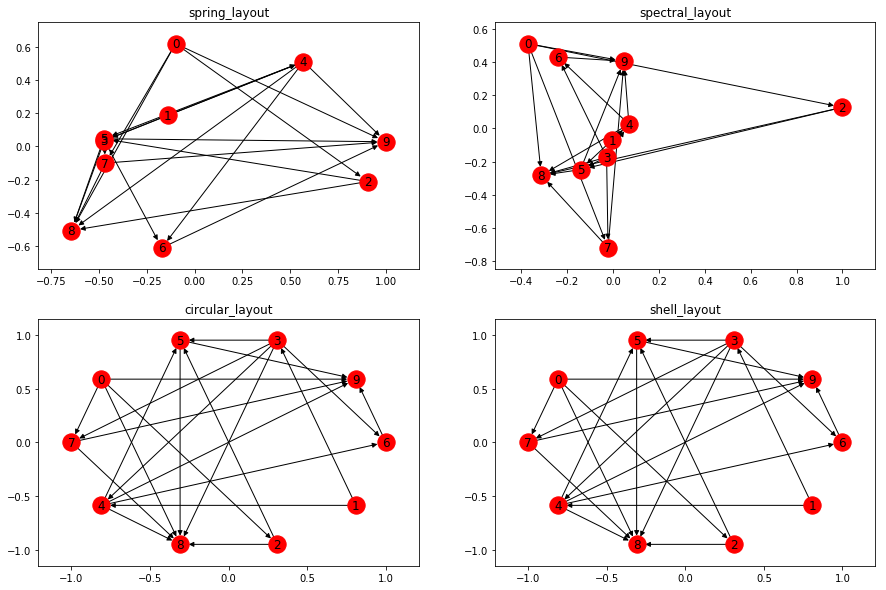

In [7]:
plt.figure(figsize=(15, 10))

plt.subplot(221)
nx.draw_networkx(G, pos=nx.spring_layout(G))
plt.title("spring_layout")

plt.subplot(222)
nx.draw_networkx(G, pos=nx.spectral_layout(G))
plt.title("spectral_layout")

plt.subplot(223)
nx.draw_networkx(G, pos=nx.circular_layout(G))
plt.title("circular_layout")

plt.subplot(224)
nx.draw_networkx(G, pos=nx.shell_layout(G))
plt.title("shell_layout")

plt.show()
plt.close()

- ツリーグラフでレイアウト確認

c:\users\jinba\appdata\local\programs\python\python37\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


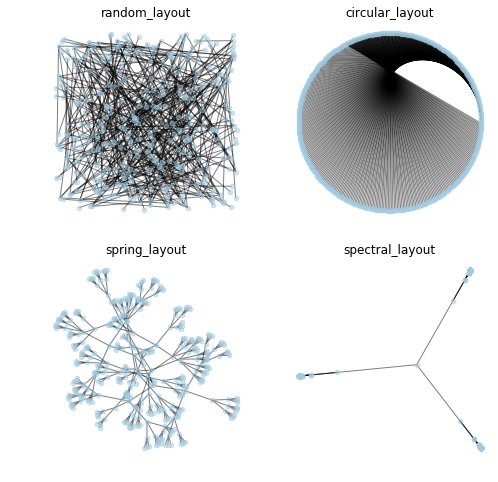

In [8]:
_G = nx.balanced_tree(3, 5)
plt.figure(figsize=(8, 8))
i=0
for title, pos in zip(
        ["random_layout", "circular_layout", "spring_layout", "spectral_layout"], 
        [nx.random_layout(_G), nx.circular_layout(_G), nx.spring_layout(_G), nx.spectral_layout(_G)]):
    i += 1
    plt.subplot(2, 2, i)
    nx.draw(_G, pos, node_size=20, alpha=0.5, node_color="#A0CBE2", with_labels=False)
    plt.title(title)
plt.show()
plt.close()

### node sizeやedge colorをいじったグラフ
- node nameをラベルにする
- edge weightをcmapで表現
- edge_colorとかdict(G.edges)から拾ったほうがいいけど、順序が不安。pythonのバージョンが古くても↓ならとりあえず機能する

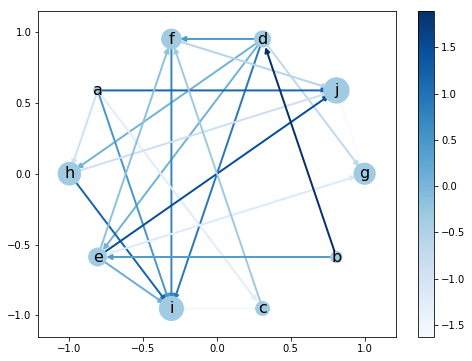

In [9]:
plt.figure(figsize=(8, 6))

labels = {key: val["name"] for key, val in dict(G.nodes).items()}
edge_color = [G.edges[key]["weight"] for key in list(G.edges)]
edge_cmap = plt.cm.Blues
node_size = [G.nodes[key]["val"] for key in list(G.nodes)]

pos = nx.circular_layout(G)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=16)
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color="#A0CBE2")
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_color, width=2, edge_cmap=edge_cmap)

pc = mpl.collections.PatchCollection(edges, cmap=edge_cmap)
pc.set_array(edge_color)
plt.colorbar(pc)
plt.show()
plt.close()

# グラフに関する情報を計算する
- 結果のそれっぽさ観察する意味でも、サンプルデータほしいなあ・・・

In [10]:
for n in range(50):
    plt.close()